In [1]:
import numpy as np
import pandas as pd
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')


onefig_size = (10,4)
multifigs_size = (12,4)

In [2]:

data = pd.read_csv("D:/Python/Recomender/ALS/notebook/data/6thang9/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Information about dataset attributes -

Pregnancies: To express the Number of pregnancies

Glucose: To express the Glucose level in blood

BloodPressure: To express the Blood pressure measurement

SkinThickness: To express the thickness of the skin

Insulin: To express the Insulin level in blood

BMI: To express the Body mass index

DiabetesPedigreeFunction: To express the Diabetes percentage

Age: To express the age

Outcome: To express the final result 1 is Yes and 0 is No

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
print(data['Pregnancies'].unique())

[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]


In [5]:
print(data['Outcome'].unique())

[1 0]


In [6]:
data['Outcome'].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

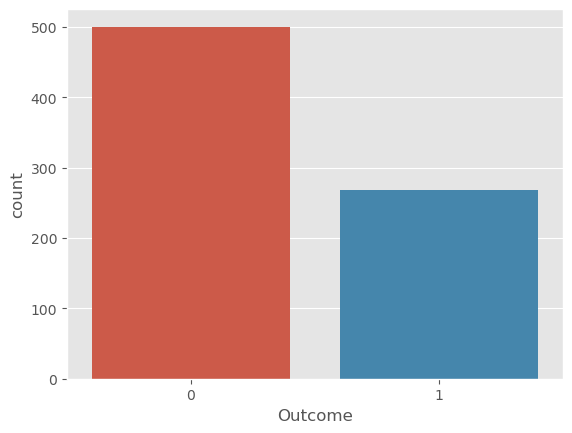

In [7]:
sns.countplot(x='Outcome',data = data)

In [8]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
print(data.shape)

(768, 9)


In [10]:
original_df = pd.read_csv(
    'D:/Python/Recomender/ALS/notebook/data/6thang9/diabetes.csv')
original_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
original_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
# Data Cleaning
df = original_df.copy()


In [14]:
# Data Duplication
dup_ind = df.duplicated()
df[dup_ind]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [15]:
df = df[dup_ind==False]
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [16]:
# Data Missing Value
df.isnull().sum()*100/df.shape[0]

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

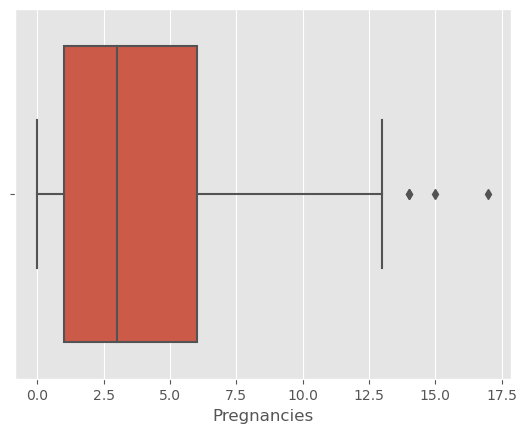

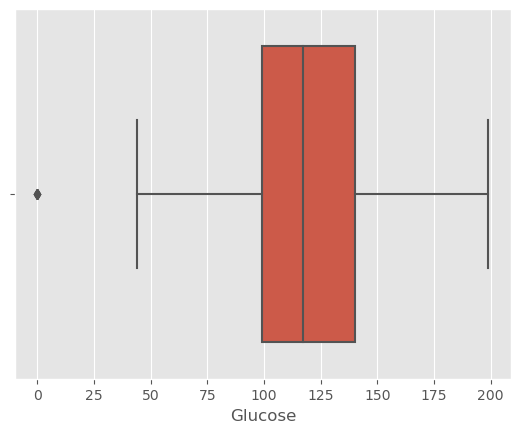

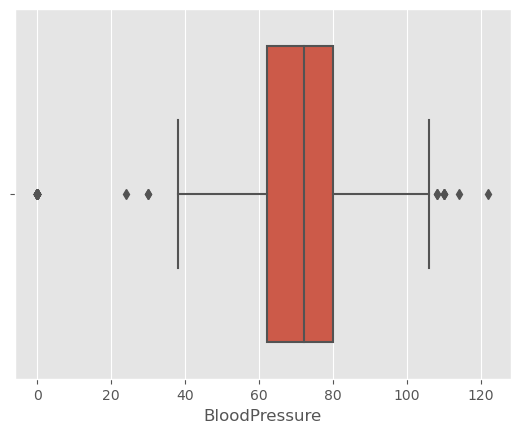

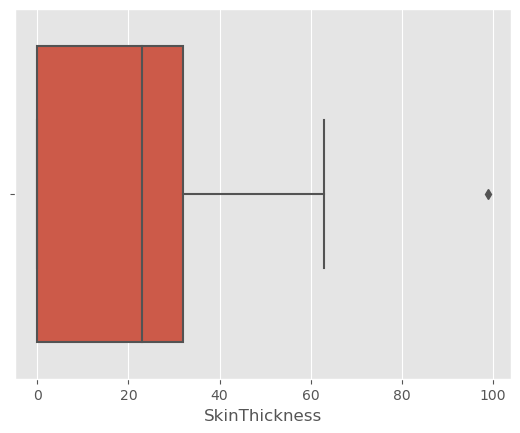

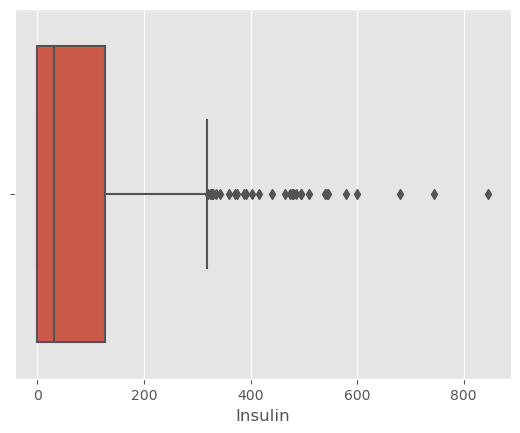

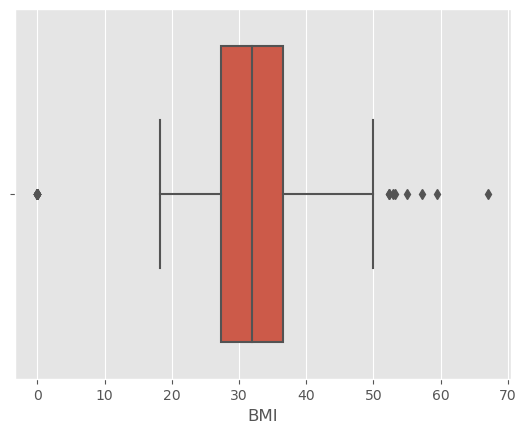

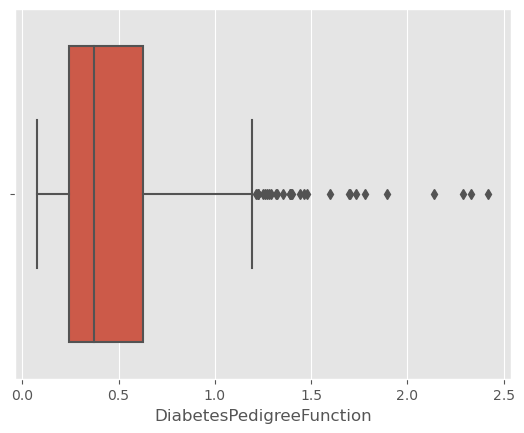

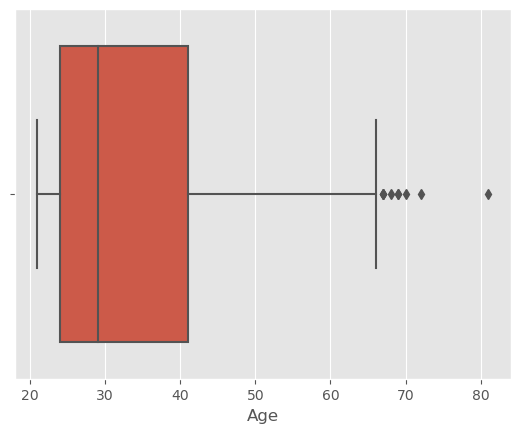

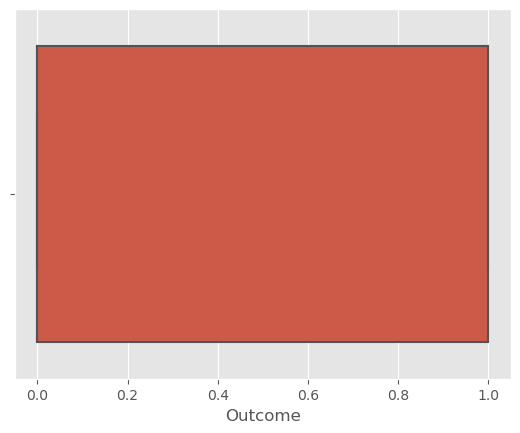

In [17]:
# Quan sát Boxplot
for c in data.columns:
    plt.figure()
    sns.boxplot(x = c, data = data, orient = "v")

In [18]:
# Quan sát ở cột insulin có nhiều giá trị 0 nên ta kiểm tra chúng 
# Kết quả : có tổng cộng 374 trường hợp Insulin bằng 0 , trong đó có 236 trường hợp không mắc tiểu đường và 138 trường hợp mắc tiểu đường 
zero_Insulin = 0
zero_Outcome_Insulin = 0
one_Outcome_Insulin = 0

for i in range(len(data["Insulin"])):
    if (data["Insulin"][i] == 0):
        zero_Insulin += 1
        if(data["Outcome"][i] == 0):
            zero_Outcome_Insulin += 1
        if(data["Outcome"][i] == 1):
            one_Outcome_Insulin += 1
            
print("The number of zero insulin values for all Outcome: ", zero_Insulin)
print("The number of zero insulin values for 0 Outcome: ", zero_Outcome_Insulin)
print("The number of zero insulin values for 1 Outcome: ", one_Outcome_Insulin)

The number of zero insulin values for all Outcome:  374
The number of zero insulin values for 0 Outcome:  236
The number of zero insulin values for 1 Outcome:  138


In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
def categorize_Age(row):
  if row["Age"] > 16 and row["Age"] < 30 :
    label = "Youth"
  elif row["Age"] >= 30 and row["Age"] < 60 :
    label = "Adult"
  else:
    label = "senior"
  return label

df['Age_Gr'] = df.apply(categorize_Age, axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Gr
0,6,148,72,35,0,33.6,0.627,50,1,Adult
1,1,85,66,29,0,26.6,0.351,31,0,Adult
2,8,183,64,0,0,23.3,0.672,32,1,Adult
3,1,89,66,23,94,28.1,0.167,21,0,Youth
4,0,137,40,35,168,43.1,2.288,33,1,Adult


In [21]:
def categorize_BMI(row):
  if row["BMI"] < 18.5:
    label = "Underweight"
  elif row["BMI"] < 25:
    label = "Balance"
  elif row["BMI"] < 30:
    label = "Overweight"
  else:
    label = "Obesity"
  return label

df['BMI_Gr'] = df.apply(categorize_BMI, axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Gr,BMI_Gr
0,6,148,72,35,0,33.6,0.627,50,1,Adult,Obesity
1,1,85,66,29,0,26.6,0.351,31,0,Adult,Overweight
2,8,183,64,0,0,23.3,0.672,32,1,Adult,Balance
3,1,89,66,23,94,28.1,0.167,21,0,Youth,Overweight
4,0,137,40,35,168,43.1,2.288,33,1,Adult,Obesity


In [22]:
def categorize_Glucose(row):
  if row["Glucose"] <= 70:
    label = "Low"
  elif row["Glucose"] > 70 and row["Glucose"] <= 99:
    label = "Normal"
  elif row["Glucose"] > 126:
    label = "Dangerous"
  else:
    label = "Secret"
  return label

df['Glucose_Gr'] = df.apply(categorize_Glucose, axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Gr,BMI_Gr,Glucose_Gr
0,6,148,72,35,0,33.6,0.627,50,1,Adult,Obesity,Dangerous
1,1,85,66,29,0,26.6,0.351,31,0,Adult,Overweight,Normal
2,8,183,64,0,0,23.3,0.672,32,1,Adult,Balance,Dangerous
3,1,89,66,23,94,28.1,0.167,21,0,Youth,Overweight,Normal
4,0,137,40,35,168,43.1,2.288,33,1,Adult,Obesity,Dangerous


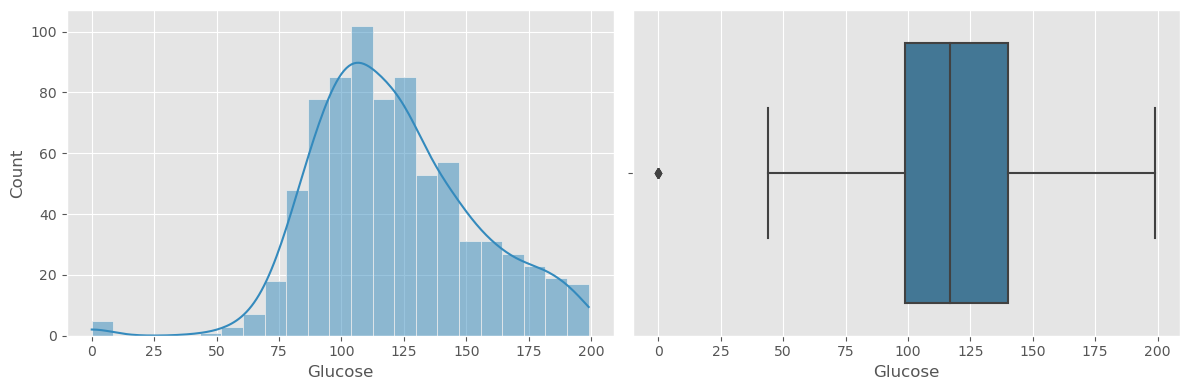

In [23]:
fig, axs = plt.subplots(ncols=2, figsize=multifigs_size)
sns.histplot(df['Glucose'], kde = True, stat='count', ax=axs[0], palette='mako')
sns.boxplot(df['Glucose'], ax=axs[1], palette='mako')
plt.tight_layout()

In [24]:
# Diabetes Pedigree Function: A function that scores the probability of diabetes based on family history
def categorize_DiabetesPedigreeFunction(row):
  if row["DiabetesPedigreeFunction"] < 0.33:
    label = "Low"
  elif row["DiabetesPedigreeFunction"] >= 0.33 and row["DiabetesPedigreeFunction"] < 0.66:
    label = "High"
  else:
    label = "Very High"
  return label

df['Genetics_risk'] = df.apply(categorize_DiabetesPedigreeFunction, axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Gr,BMI_Gr,Glucose_Gr,Genetics_risk
0,6,148,72,35,0,33.6,0.627,50,1,Adult,Obesity,Dangerous,High
1,1,85,66,29,0,26.6,0.351,31,0,Adult,Overweight,Normal,High
2,8,183,64,0,0,23.3,0.672,32,1,Adult,Balance,Dangerous,Very High
3,1,89,66,23,94,28.1,0.167,21,0,Youth,Overweight,Normal,Low
4,0,137,40,35,168,43.1,2.288,33,1,Adult,Obesity,Dangerous,Very High


In [25]:
# Blood Pressure: Blood pressure higher than 90 is risky

df["BloodPressure_risk"]=[1 if i>90 else 0 for i in df["BloodPressure"]]

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Gr,BMI_Gr,Glucose_Gr,Genetics_risk,BloodPressure_risk
0,6,148,72,35,0,33.6,0.627,50,1,Adult,Obesity,Dangerous,High,0
1,1,85,66,29,0,26.6,0.351,31,0,Adult,Overweight,Normal,High,0
2,8,183,64,0,0,23.3,0.672,32,1,Adult,Balance,Dangerous,Very High,0
3,1,89,66,23,94,28.1,0.167,21,0,Youth,Overweight,Normal,Low,0
4,0,137,40,35,168,43.1,2.288,33,1,Adult,Obesity,Dangerous,Very High,0


In [26]:
# Insulin value between 16-166 is “Normal”,  in other cases it is “Abnormal”
def categorize_Insulin(row):
  if row["Insulin"] < 16:
    label = "Abnormal"
  elif row["Insulin"] >= 16 and row["Insulin"] <= 166:
    label = "Normal"
  else:
    label = "Abnormal"
  return label

df['Insulin_risk'] = df.apply(categorize_Insulin, axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Gr,BMI_Gr,Glucose_Gr,Genetics_risk,BloodPressure_risk,Insulin_risk
0,6,148,72,35,0,33.6,0.627,50,1,Adult,Obesity,Dangerous,High,0,Abnormal
1,1,85,66,29,0,26.6,0.351,31,0,Adult,Overweight,Normal,High,0,Abnormal
2,8,183,64,0,0,23.3,0.672,32,1,Adult,Balance,Dangerous,Very High,0,Abnormal
3,1,89,66,23,94,28.1,0.167,21,0,Youth,Overweight,Normal,Low,0,Normal
4,0,137,40,35,168,43.1,2.288,33,1,Adult,Obesity,Dangerous,Very High,0,Abnormal


In [27]:
# Categorical Variables
cat_df = df.select_dtypes(include="object").copy()
cat_df.head()

,Age_Gr,BMI_Gr,Glucose_Gr,Genetics_risk,Insulin_risk
0,Adult,Obesity,Dangerous,High,Abnormal
1,Adult,Overweight,Normal,High,Abnormal
2,Adult,Balance,Dangerous,Very High,Abnormal
3,Youth,Overweight,Normal,Low,Normal
4,Adult,Obesity,Dangerous,Very High,Abnormal


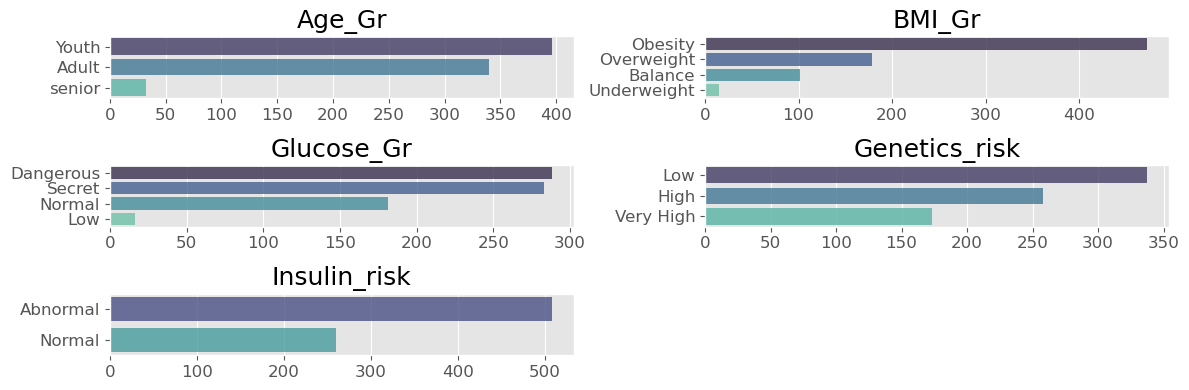

In [28]:
num_plot = len(cat_df.columns)
num_cols = min(num_plot, 2)
num_rows = int(num_plot / num_cols) + (1 if num_plot % num_cols != 0 else 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=multifigs_size)

if isinstance(axes, np.ndarray):
  list_axes = list(axes.flat)
else:
  list_axes = [axes]

for index, col in enumerate(cat_df.columns):
  df_count = df[col].value_counts()

  if (df_count.index.dtype == np.int64):
    df_count.index = map(str, df_count.index)

  sns.barplot(ax = list_axes[index] , x = df_count.values, y = df_count.index , alpha=0.8, palette='mako')
  list_axes[index].set_title(col, fontsize=18)
  list_axes[index].tick_params(axis="x", labelsize=12)
  list_axes[index].tick_params(axis="y", labelsize=12)


for i in range(num_plot, len(list_axes)):
  list_axes[i].set_visible(False)


fig.tight_layout()
plt.show()

In [29]:
for col in cat_df.columns:
  temp_df = df[col].value_counts().rename_axis(col).reset_index(name='counts')
  temp_df["frequency"] = round(temp_df["counts"]/len(df) * 100, 2)
  print(temp_df)

   Age_Gr  counts  frequency
0   Youth     396      51.56
1   Adult     340      44.27
2  senior      32       4.17
        BMI_Gr  counts  frequency
0      Obesity     472      61.46
1   Overweight     179      23.31
2      Balance     102      13.28
3  Underweight      15       1.95
  Glucose_Gr  counts  frequency
0  Dangerous     288      37.50
1     Secret     283      36.85
2     Normal     181      23.57
3        Low      16       2.08
  Genetics_risk  counts  frequency
0           Low     337      43.88
1          High     258      33.59
2     Very High     173      22.53
  Insulin_risk  counts  frequency
0     Abnormal     508      66.15
1       Normal     260      33.85


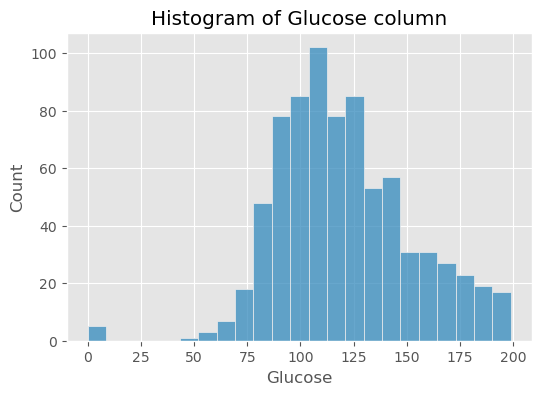

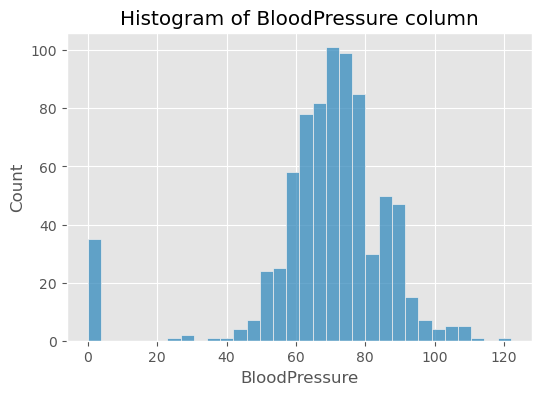

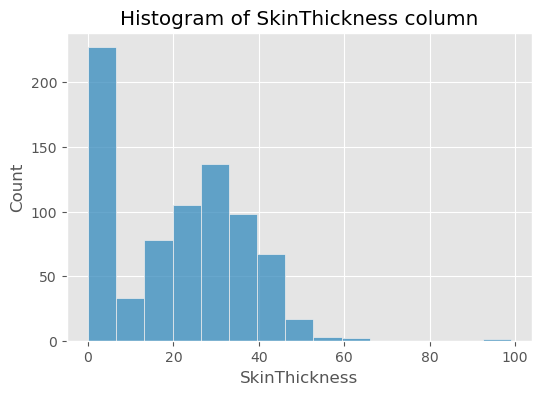

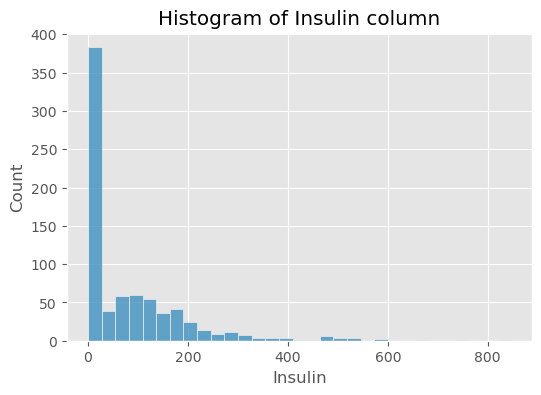

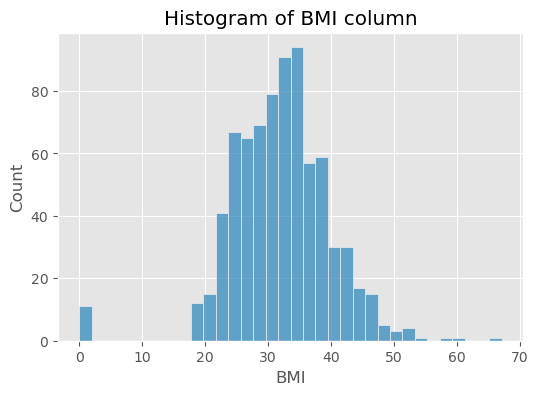

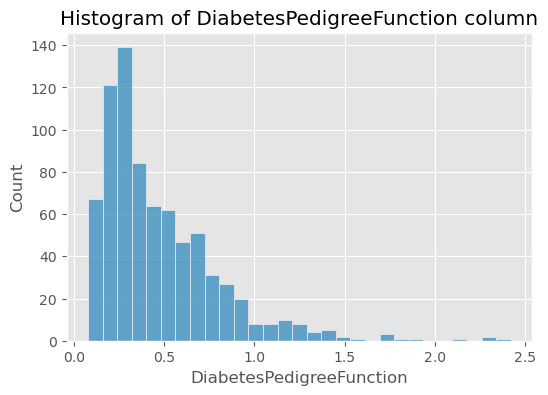

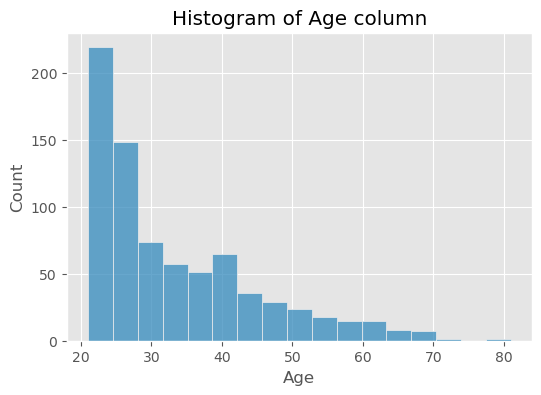

In [30]:
# making histograms of the following columns to see their distribution
num_col = ['Glucose',"BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col])
    plt.title("Histogram of {} column".format(col))
    plt.show()
# Thông qua Histogram có thể quan sát được : các cột "Glucose" "BloodPressure" B và "BMI" phân bố đồng đều , còn các cột "Insulin" "DiabetesPedigreeFunction" và "Age"

In [31]:
# Suppliment heat map
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressure_risk
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.072904
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.084185
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.359128
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.057015
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.074361
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.113301
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,-0.018918
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.145521
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.059703
BloodPressure_risk,0.072904,0.084185,0.359128,-0.057015,-0.074361,0.113301,-0.018918,0.145521,0.059703,1.000000


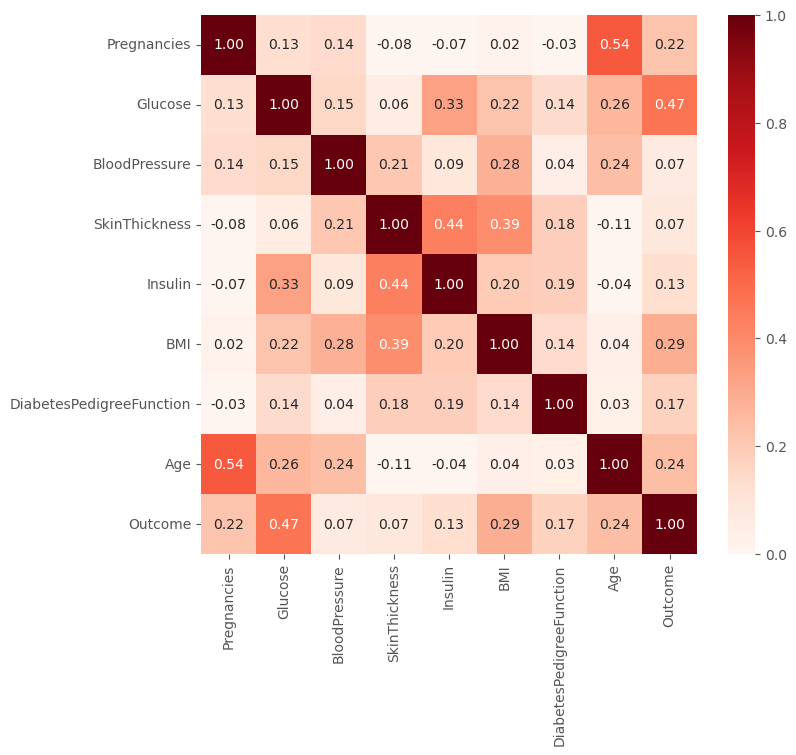

In [32]:
#ρX , Y = cov ( X , Y ) / σXσY
#càng gần 1, mqh tuyến tính thuận càng cao
#càng gần 0, mqh tuyến tính càng thấp
#càng gần -1, mqh tuyến tính nghịch càng cao
plt.figure(figsize = (8.0, 7.0))
plt.grid(False)
plt.xticks(range(data.shape[1]), data.columns[0:], rotation=0)
plt.yticks(range(data.shape[1]), data.columns[0:], rotation=0)
sns.heatmap(data.corr(), cbar=True, annot=True, square=False, fmt='.2f', cmap=plt.cm.Reds, robust=False, vmin=0)
plt.show()
# Quan sát biểu đồ ta thấy được , Diabetes tương quan với các trường Glucose , BMI , Age

<Axes: xlabel='Age', ylabel='Count'>

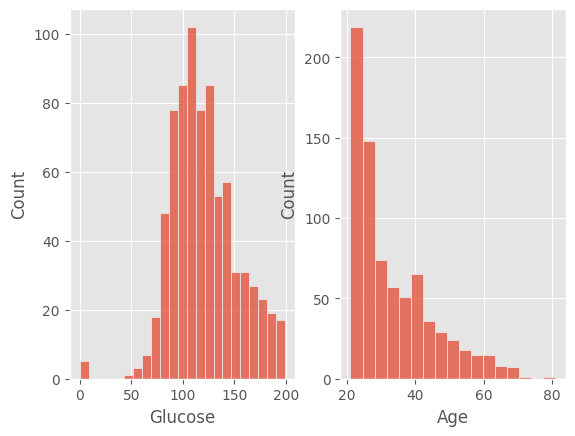

In [ ]:
plt.subplot(1,2,1)
sns.histplot(df['Glucose'])
plt.subplot(1,2,2)
sns.histplot(df['Age'])
#I think there may be a link between glucose and age. that is, the glucose value of an old person and the glucose value of a young person will not give the same effect at the same level.
#It is normal for a young person to have glucose levels between 50 and 150

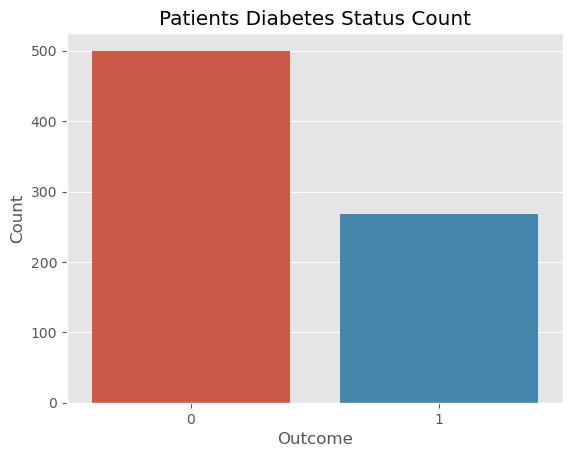

In [33]:
# Quan sát cho thấy nhiêu người không mắc tiểu đường hơn những người mắc tiểu đường trong tập dữ liệu
# Cụ thể là 500 người không mắc tiểu đường và 268 người mắc tiểu đường
D = sns.countplot(x='Outcome', data=df).set(title='Patients Diabetes Status Count', xlabel='Outcome', ylabel='Count')

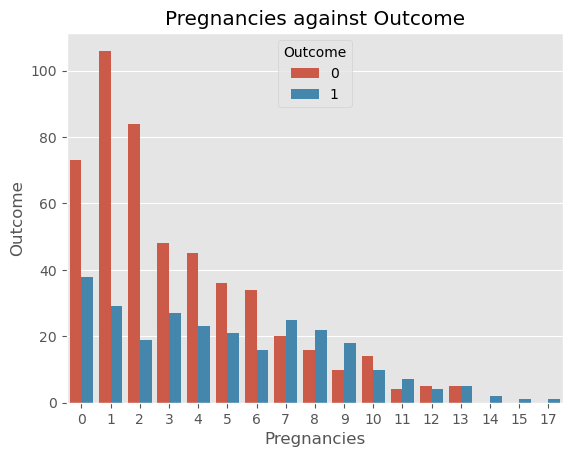

In [34]:

D = sns.countplot(x='Pregnancies', hue='Outcome', data=df).set(title='Pregnancies against Outcome', xlabel='Pregnancies', ylabel='Outcome')
# quan sát ta thấy được người đang mang thai từ 14 lần trở lên là cho kết quả Outcomr = 1 tức sẽ bị mắc bệnh tiểu đường  
#(Thai phụ đã từng bị tiểu đường thai kỳ ở lần mang thai trước có nguy cơ sẽ mắc lại bệnh ở các lần mang thai tiếp theo, và nguy cơ sẽ ngày càng gia tăng)

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64


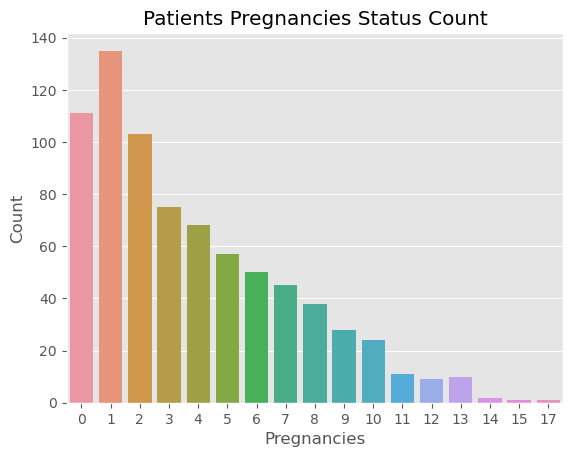

In [35]:
# Kiểm tra trường "Pregnancies" 
# Quan sát ta thấy được Patient Pregnancies chiếm số lượng ít trong tập dữ liệu
plt.figure()
sns.countplot(data["Pregnancies"])
print(data["Pregnancies"].value_counts())
D = sns.countplot(x='Pregnancies', data=df).set(title='Patients Pregnancies Status Count', xlabel='Pregnancies', ylabel='Count')

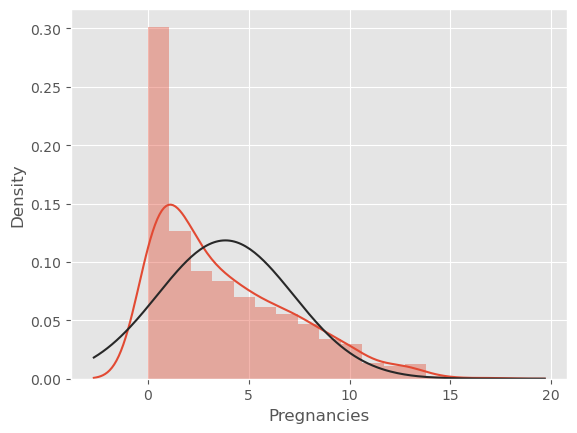

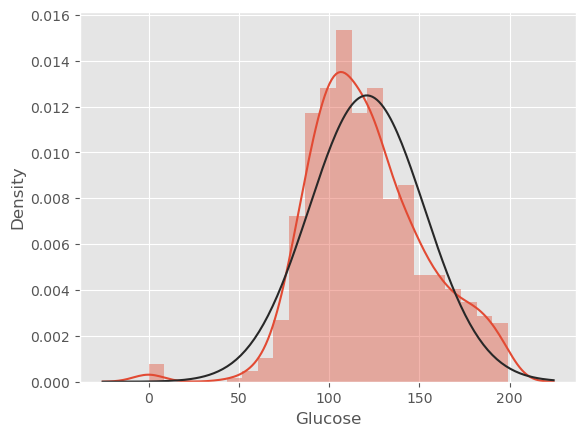

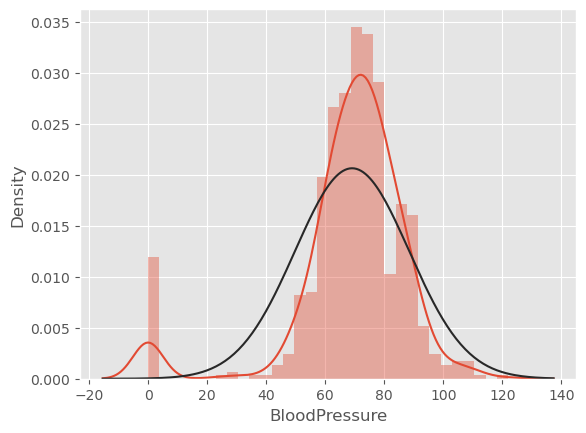

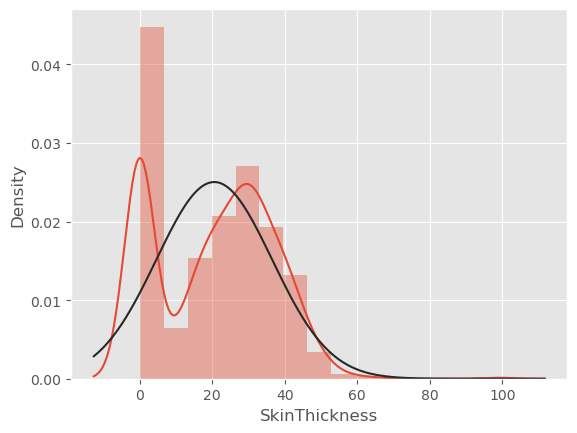

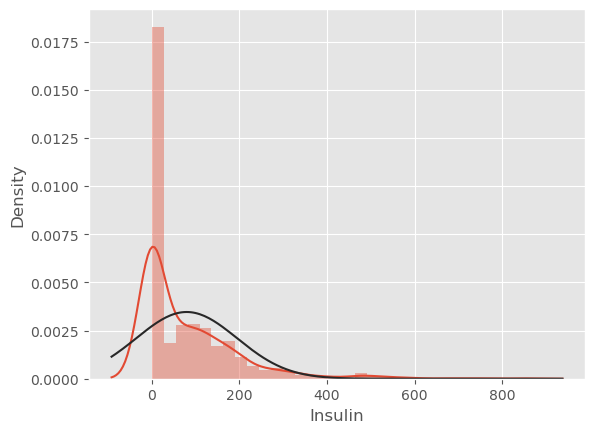

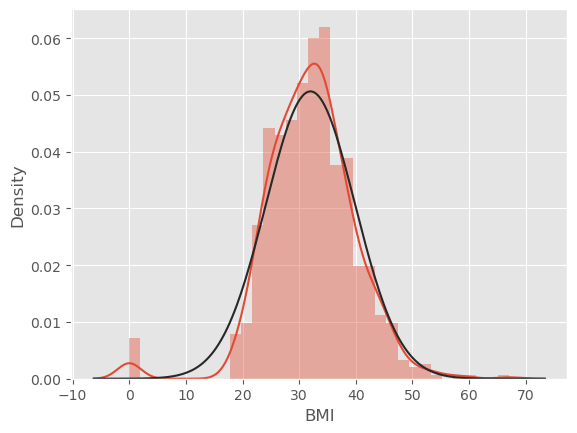

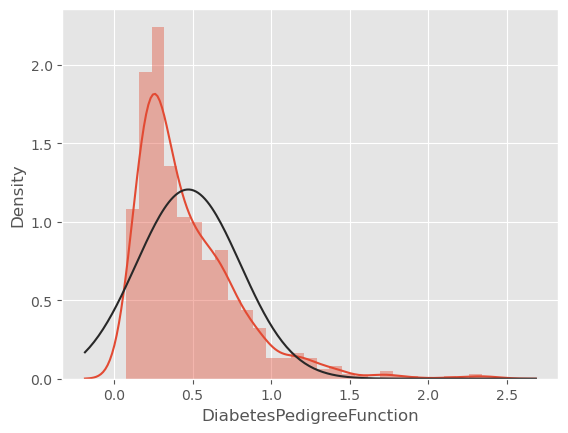

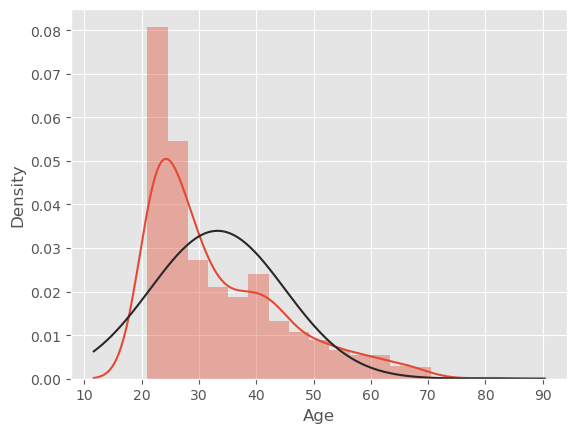

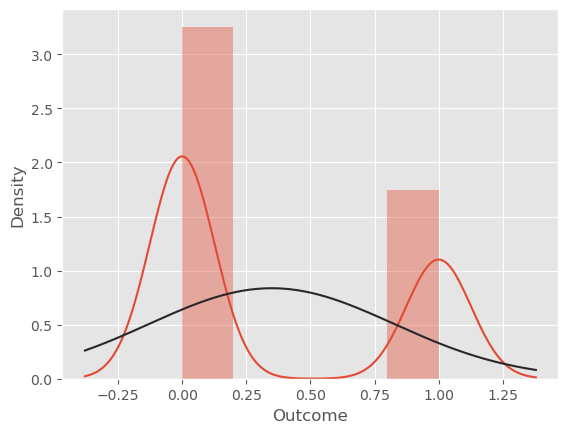

In [36]:
# Feature Engineering
# quan sát ta thấy được "Blood Pressure , Glucose , BMI " phân bố đồng đều , "SkinThickness , Insulin" có giá trị bằng không là giá trị ngoại lệ 
for i in data.columns:
    plt.figure()
    sns.distplot(data[i], fit = norm)
    plt.show()


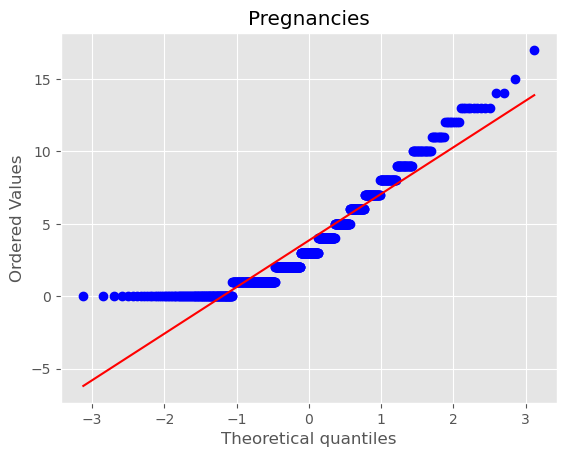

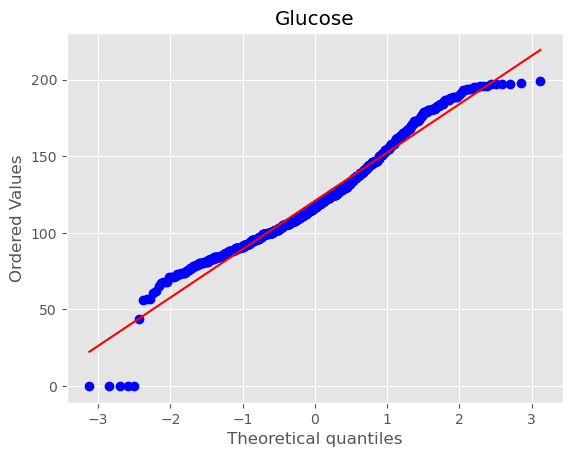

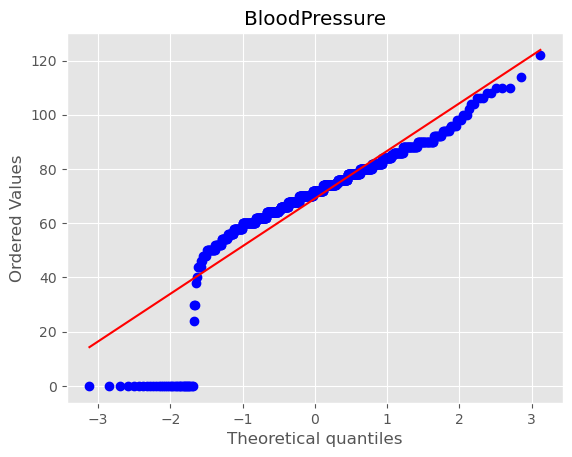

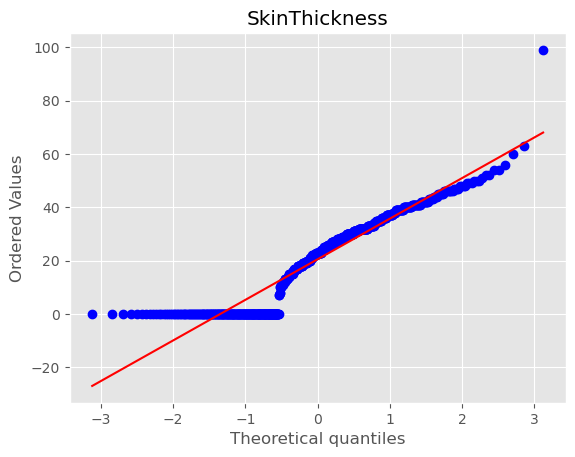

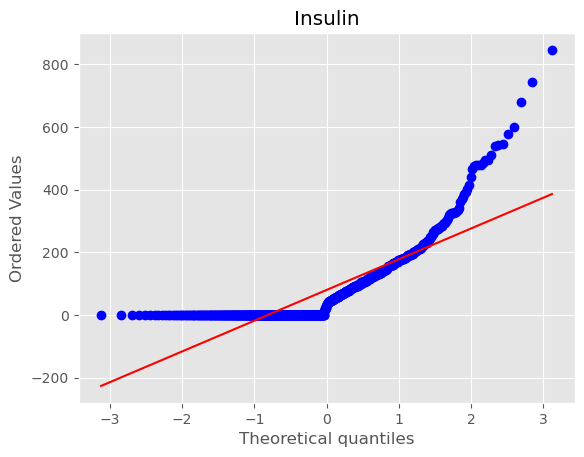

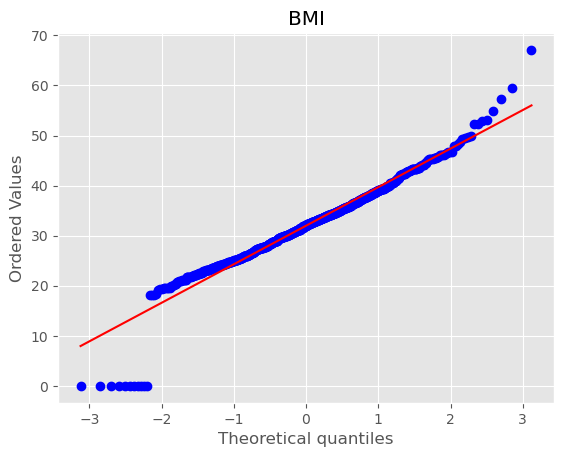

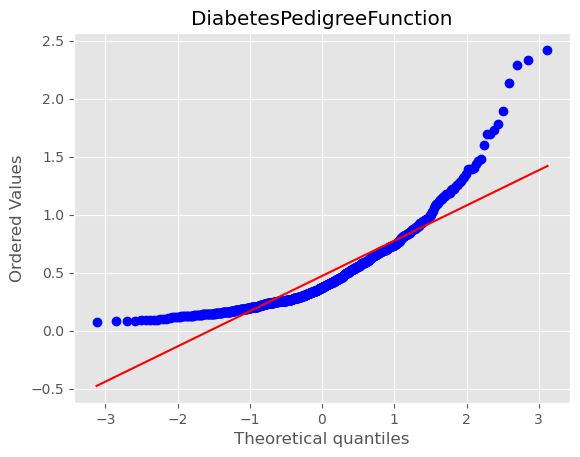

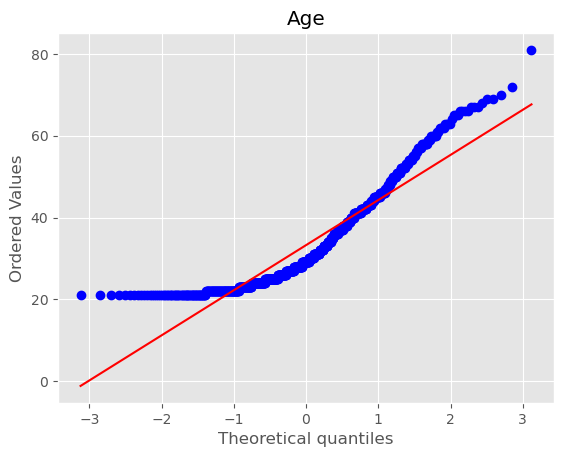

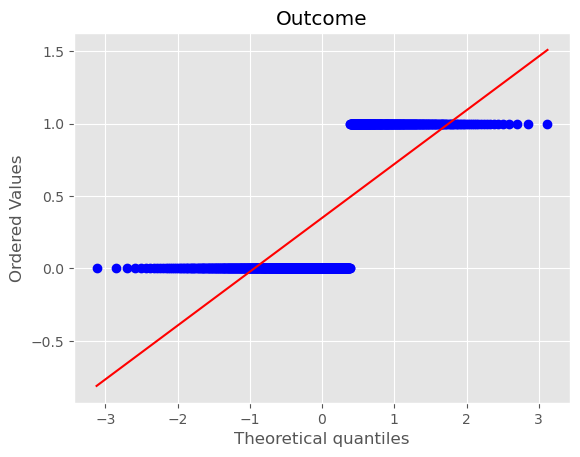

In [37]:
for i in data.columns:
    plt.figure()
    stats.probplot(data[i], plot = plt)
    plt.title(i)
    plt.show()

In [38]:
# Độ lệch 
skewed_feats = data.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feats, columns = ["Skewed"])
skewness

,Skewed
Insulin,2.267810
DiabetesPedigreeFunction,1.916159
Age,1.127389
Pregnancies,0.899912
Outcome,0.633776
Glucose,0.173414
SkinThickness,0.109159
BMI,-0.428143
BloodPressure,-1.840005


There are 268 (34.90%) people who have diabetes and the remaining 500 (65.10%) who have not been diagnosed with the desease.


TypeError: tight_layout() takes 0 positional arguments but 1 was given

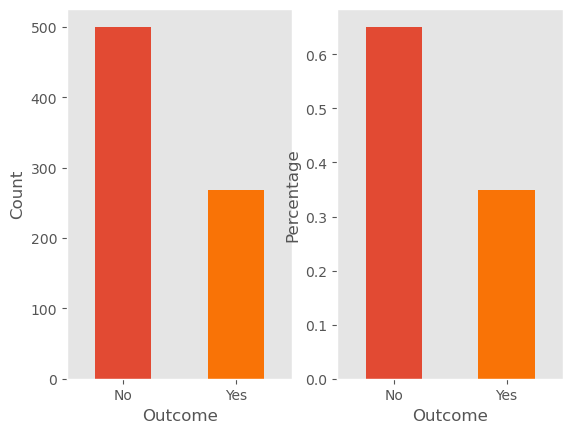

In [39]:
# Biểu đồ quan sát có bao nhiêu người mắc bệnh tiểu đường 
num_diabetes = data[ "Outcome" ].sum()
num_no_diabetes = data.shape[ 0 ] - num_diabetes
perc_diabetes = num_diabetes / data.shape[ 0 ] * 100
perc_no_diabetes = num_no_diabetes / data.shape[ 0 ] * 100
print( "There are %d (%.2f%%) people who have diabetes and the remaining %d (%.2f%%) who have not been diagnosed with the desease." % ( num_diabetes, perc_diabetes, num_no_diabetes, perc_no_diabetes ) )
def plot_diabetes( normalize ):
    plt.grid( False )
    data.Outcome.value_counts( normalize=normalize ).plot( kind="bar", grid=False, color=[ sns.color_palette()[ 0 ], sns.colors.xkcd_rgb.get( 'orange' ) ] )
    plt.xticks( [ 0, 1 ], [ 'No', 'Yes' ], rotation=0 )
    plt.xlabel( "Outcome" )
    
    if ( normalize == False ):
        plt.ylabel( "Count" )
    else:
        plt.ylabel( "Percentage" )    
        
    return
    
plt.subplot( 1, 2, 1 )
plot_diabetes( False )
plt.subplot( 1, 2, 2 )
plot_diabetes( True )
plt.tight_layout( True )
plt.show()

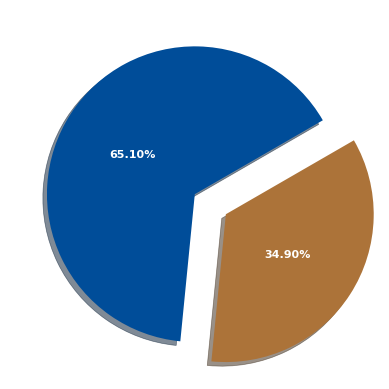

In [40]:
plt.pie(df['Outcome'].value_counts(),
                   explode      = [0.0, 0.25], 
                   startangle   = 30, 
                   shadow       = True, 
                   colors       = ['#004d99', '#ac7339'], 
                   textprops    = {'fontsize': 8, 'fontweight': 'bold', 'color': 'white'},
                   pctdistance  = 0.50, autopct = '%1.2f%%'
                  );


TypeError: tight_layout() takes 0 positional arguments but 1 was given

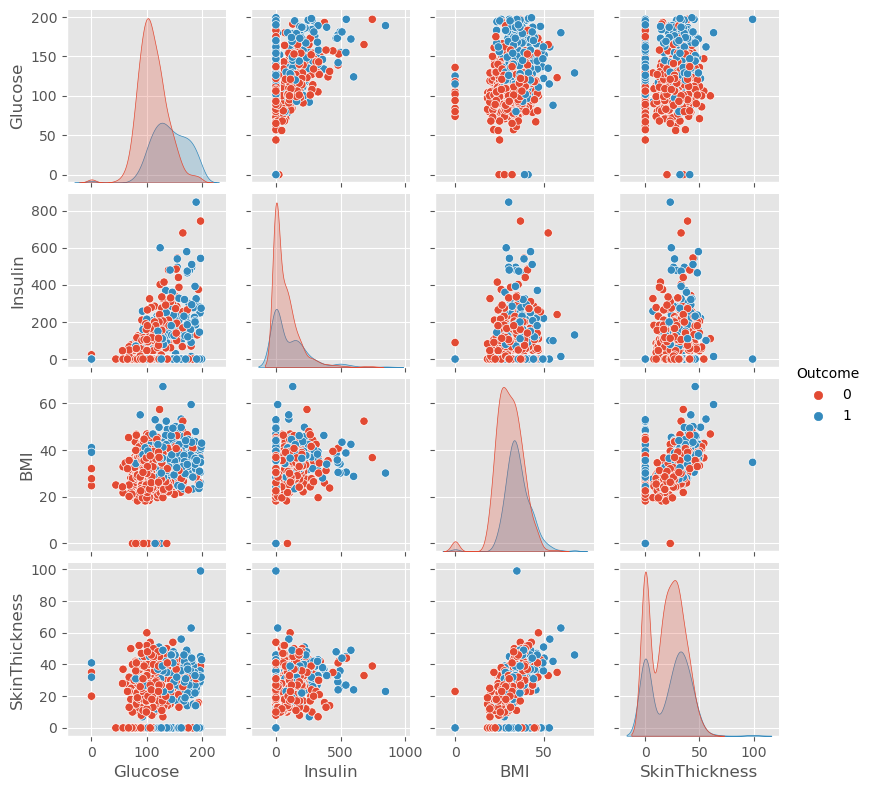

In [41]:
#Scatter Plot
#Glucose-Outcome: Nồng độ glucose cao => Chẩn đoán nguy cơ mắc bệnh tiểu đường cao hơn
#Glucose-Insulin: Nồng độ glucose cao hơn => Nồng độ Insulin nhiều hơn
#BMI-SkinThickness: BMI càng => Có độ dày da lớn => người càng béo
sns.pairplot(data.dropna(), vars = ['Glucose', 'Insulin','BMI','SkinThickness',], size= 2.0, diag_kind='kde', hue='Outcome')
plt.tight_layout(False)
plt.show()

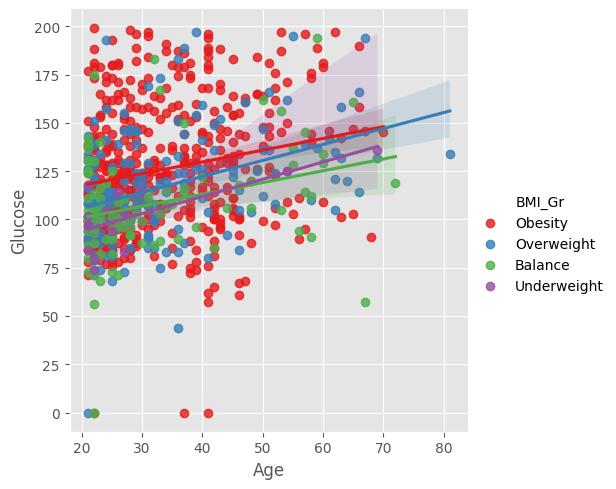

In [ ]:
sns.lmplot(x='Age', y='Glucose', data=df, hue='BMI_Gr', palette='Set1')
# Quan sát được người có BMI ở trạng thái "Obesity" thì sẽ có nồng độ Glucose cao ( đa số có độ tuổi từ 20-50)

<AxesSubplot:xlabel='BMI_Gr', ylabel='Insulin'>

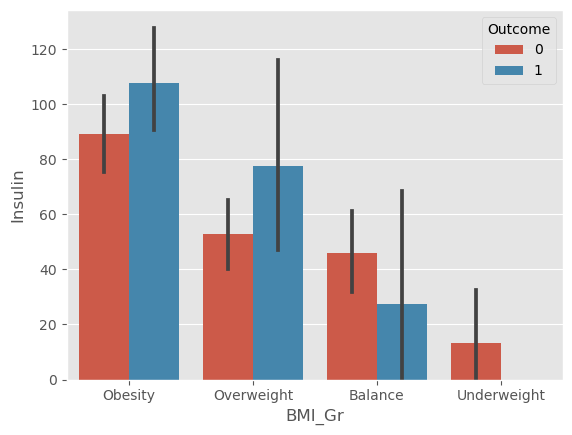

In [42]:
sns.barplot(x='BMI_Gr', y='Insulin', hue='Outcome', data=df)
#Quan sát ta thấy được người gầy sẽ có nồng độ insulin thấp và không có nguy cơ mắc bệnh tiểu đường 


In [ ]:
#CONCLUSION

I conclude that the patient who suffer from diabetes have following characteristics than those who do not suffer.
They are older
They have high glucose level
They have high blood pressure
They have high bmi
They have high diabetes pedigree function

For the skin thickness and insulin I cannot say for sure because they contain large number of zero values and I imputed the zero values in them with their means. So, it can result in wrong conclusions.

In [ ]:
# Train Test Split

In [43]:
x = data.drop(["Outcome"], axis = 1)
y = data["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)
scaler = StandardScaler()
SSX_train = scaler.fit_transform(x_train)
SSX_test = scaler.transform(x_test)

Rscaler =  RobustScaler()
RSX_train = Rscaler.fit_transform(x_train)
RSX_test = Rscaler.transform(x_test)

train_test = [SSX_train, RSX_train, SSX_test, RSX_test]

x_train shape:  (576, 8)
x_test shape:  (192, 8)
y_train shape:  (576,)
y_test shape:  (192,)


In [44]:
from sklearn.decomposition import PCA

pca=PCA(0.95)
x_pca = pca.fit_transform(data)
x_pca

array([[-75.71424916, -35.95494354],
       [-82.35846646,  28.90955895],
       [-74.63022933, -67.90963328],
       ...,
       [ 32.11298721,   3.37922193],
       [-80.21409513, -14.19059537],
       [-81.30834662,  21.6230423 ]])

In [45]:
pca.n_components_

2

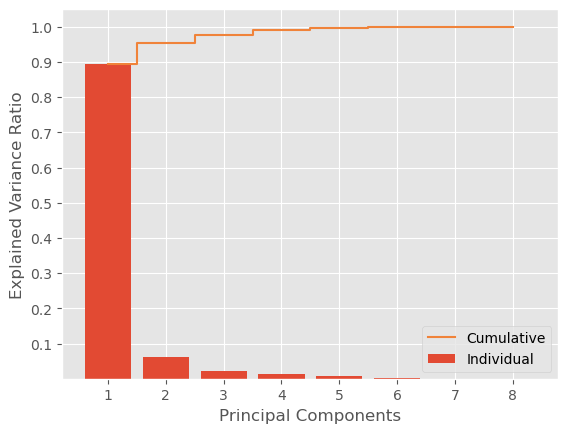

In [46]:
# Co chiều dữ liệu
#chuẩn hóa tập dữ liệu , được biểu diễn bằng ma trận X có kích thước n × d , trong đó n là số mẫu và d là số đặc trưng ban đầu.
#tính toán ma trận hiệp phương sai mẫu Σ của dữ liệu có kích thước d × d.
# phân rã eigen của Σ để thu được tập hợp các eigenvalue và eigenvectors tương ứng.
#xây dựng ma trận chiếu W kích thước d × l chứa trên các cột của nó l vector riêng của Σ tương ứng với giá trị riêng của cường độ lớn nhất, nơi l là số mong muốn các tính năng sau khi chuyển đổi PCA.
#thực hiện phép biến đổi PCA để thu được tập dữ liệu thu gọn Z = X × W có kích thước n × l .

from sklearn.decomposition import PCA
pca = PCA( whiten=True )
pca.fit( x_train )
pca_evr = pca.explained_variance_ratio_
pca_evr_cum = np.cumsum( pca_evr )
x = np.arange( 1, len( pca_evr ) + 1 )
y = np.linspace( 0.1, 1, 10 )
plt.bar( x, pca_evr, alpha=1, align='center', label='Individual' )
plt.step( x, pca_evr_cum, where='mid', label='Cumulative', color=sns.colors.xkcd_rgb.get( 'dusty orange' ) )
plt.ylabel( 'Explained Variance Ratio' )
plt.xlabel( 'Principal Components' )
plt.legend()
plt.xticks( x )
plt.yticks( y )
plt.show()

In [47]:
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.fit_transform(x_test)
print("Train Set columns: ", X_train_pca.shape[1])
print("Test Set Columns: ", X_test_pca.shape[1])

Train Set columns:  6
Test Set Columns:  6


In [48]:
# Naive Bayes 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

ResoltML_Data = pd.DataFrame(columns = ["Model_Name", "SS_Score", "RS_Score"])
Model_Name = ["GNB","BNB","LR","KNN","RFC"] 
ResoltML_Data["Model_Name"] = Model_Name
ResoltML_Data


,Model_Name,SS_Score,RS_Score
0,GNB,NaN,NaN
1,BNB,NaN,NaN
2,LR,NaN,NaN
3,KNN,NaN,NaN
4,RFC,NaN,NaN


In [49]:
#GaussianNB

for i in range(0,1):
    
    gnb = GaussianNB()
    gnb.fit(train_test[i], y_train)
    y_pred = gnb.predict(train_test[i+2])

    gnb_csv = cross_val_score(estimator = gnb, X = train_test[i], y = y_train, cv = 5)

    
    print("GaussianNB Accuracy: ", accuracy_score(y_pred,y_test))

    print("GaussianNB Test Score: ", gnb.score(train_test[i+2], y_test))
    print("GaussianNB Train Score: ", gnb.score(train_test[i], y_train))

    print("GaussianNB Cross Validation Mean: ", gnb_csv.mean())
    print("GaussianNB Cross Validation Std: ", gnb_csv.std())
    print("-------------------------------------------")
    
    if (i == 0):
        ResoltML_Data["SS_Score"][0] = accuracy_score(y_pred,y_test)
    else:
        ResoltML_Data["RS_Score"][0] = accuracy_score(y_pred,y_test)

GaussianNB Accuracy:  0.734375
GaussianNB Test Score:  0.734375
GaussianNB Train Score:  0.7638888888888888
GaussianNB Cross Validation Mean:  0.7482608695652174
GaussianNB Cross Validation Std:  0.03889785955886093
-------------------------------------------


In [50]:
#BernoulliNB

for i in range(0,2):
    
    bnb = BernoulliNB()
    bnb.fit(train_test[i], y_train)
    y_pred_bnb = bnb.predict(train_test[i+2])

    bnb_cvs = cross_val_score(estimator = gnb, X = train_test[i], y = y_train, cv = 5)

    print("GaussianNB Accuracy: ", accuracy_score(y_pred_bnb,y_test))

    print("GaussianNB Test Score: ", bnb.score(train_test[i+2], y_test))
    print("GaussianNB Train Score: ", bnb.score(train_test[i], y_train))

    print("GaussianNB Cross Validation Mean: ", bnb_cvs.mean())
    print("GaussianNB Cross Validation Std: ", bnb_cvs.std())
    print("-------------------------------------------")
    
    if (i == 0):
        ResoltML_Data["SS_Score"][1] = accuracy_score(y_pred_bnb,y_test)
    else:
        ResoltML_Data["RS_Score"][1] = accuracy_score(y_pred_bnb,y_test)


GaussianNB Accuracy:  0.6666666666666666
GaussianNB Test Score:  0.6666666666666666
GaussianNB Train Score:  0.734375
GaussianNB Cross Validation Mean:  0.7482608695652174
GaussianNB Cross Validation Std:  0.03889785955886093
-------------------------------------------
GaussianNB Accuracy:  0.6927083333333334
GaussianNB Test Score:  0.6927083333333334
GaussianNB Train Score:  0.7065972222222222
GaussianNB Cross Validation Mean:  0.7482608695652174
GaussianNB Cross Validation Std:  0.03889785955886093
-------------------------------------------


In [51]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
for i in range(0,2):
    knn_grid = KNeighborsClassifier()

    p_knn = {"n_neighbors" : range(1,100), "weights" : ["uniform", "distance"], "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"], "p" : [1,2]}

    grid_knn = GridSearchCV(estimator = knn_grid, param_grid = p_knn, scoring = "accuracy", cv = 4)
    grid_knn_search = grid_knn.fit(train_test[i], y_train)
    y_pred_grid_knn = grid_knn.predict(train_test[i+2])

    best_parm_grid_knn = grid_knn_search.best_params_
    best_score_grid_knn = grid_knn_search.best_score_

    print("GridSearch ile knn modelinin en iyi parametırları: ", best_parm_grid_knn)
    print("GridSearch ile knn modelinin en iyi skoru: ",best_score_grid_knn)

    if (i == 0):
        ResoltML_Data["SS_Score"][2] = accuracy_score(y_pred_grid_knn,y_test)
    else:
        ResoltML_Data["RS_Score"][2] = accuracy_score(y_pred_grid_knn,y_test)

GridSearch ile knn modelinin en iyi parametırları:  {'algorithm': 'auto', 'n_neighbors': 24, 'p': 2, 'weights': 'distance'}
GridSearch ile knn modelinin en iyi skoru:  0.7638888888888888
GridSearch ile knn modelinin en iyi parametırları:  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
GridSearch ile knn modelinin en iyi skoru:  0.779513888888889


In [52]:
from sklearn.linear_model import LogisticRegression
for i in range(0,2):
    logr = LogisticRegression(random_state = 0)

    p_lr = [{"penalty" : ["l1","l2"], "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
             "multi_class" : ["auto","ovr","multinomial"]}]

    grid_lr = GridSearchCV(estimator = logr, param_grid = p_lr, scoring = "accuracy", cv = 4)
    grid_search_lr = grid_lr.fit(train_test[i], y_train)
    y_pred_lr = grid_search_lr.predict(train_test[i+2])

    best_parm_grid_lr = grid_search_lr.best_params_
    best_score_grid_lr = grid_search_lr.best_score_

    print("Best prameter of gridseach function: ", best_parm_grid_lr)
    print("Best score of gridsearch function: ", best_score_grid_lr )

    if (i == 0):
        ResoltML_Data["SS_Score"][3] = accuracy_score(y_pred_lr,y_test)
    else:
        ResoltML_Data["RS_Score"][3] = accuracy_score(y_pred_lr,y_test)

Best prameter of gridseach function:  {'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
Best score of gridsearch function:  0.7725694444444444
Best prameter of gridseach function:  {'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
Best score of gridsearch function:  0.7743055555555556


In [53]:
from sklearn.ensemble import RandomForestClassifier
for i in range(0,2):
    rfc = RandomForestClassifier()

    p_rfc = {"n_estimators" : range(1,50), "criterion" : ["gini", "entropy","log_loss"], "max_features" : ["sqrt","log2", None], 
             "class_weight" : ["balanced", "balanced_subsample"]}

    grid_rfc = GridSearchCV(estimator = rfc, param_grid = p_rfc, scoring = "accuracy", cv = 4)
    grid_rfc_search = grid_rfc.fit(train_test[i], y_train)
    y_pred_grid_rfc = grid_rfc.predict(train_test[i+2])

    best_parm_grid_rfc = grid_rfc_search.best_params_
    best_score_grid_rfc = grid_rfc_search.best_score_

    print("GridSearch ile rfc modelinin en iyi parametırları: ", best_parm_grid_rfc)
    print("GridSearch ile rfc modelinin en iyi skoru: ",best_score_grid_rfc)

    if (i == 0):
        ResoltML_Data["SS_Score"][4] = accuracy_score(y_pred_grid_rfc,y_test)
    else:
        ResoltML_Data["RS_Score"][4] = accuracy_score(y_pred_grid_rfc,y_test)

GridSearch ile rfc modelinin en iyi parametırları:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 27}
GridSearch ile rfc modelinin en iyi skoru:  0.7934027777777777
GridSearch ile rfc modelinin en iyi parametırları:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 42}
GridSearch ile rfc modelinin en iyi skoru:  0.7881944444444444


In [74]:
best_parm_grid_rfc


{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_features': 'sqrt',
 'n_estimators': 42}

In [56]:
best_model_grid_rfc = grid_rfc_search.best_estimator_
joblib.dump(best_model_grid_rfc, 'rfc_model.pkl')

In [72]:
new_model.predict([[6, 92, 92, 0, 0, 19.9, 0.188, 22]])


array([1], dtype=int64)

Text(0.5, 1.0, 'Result with StandartScaler')

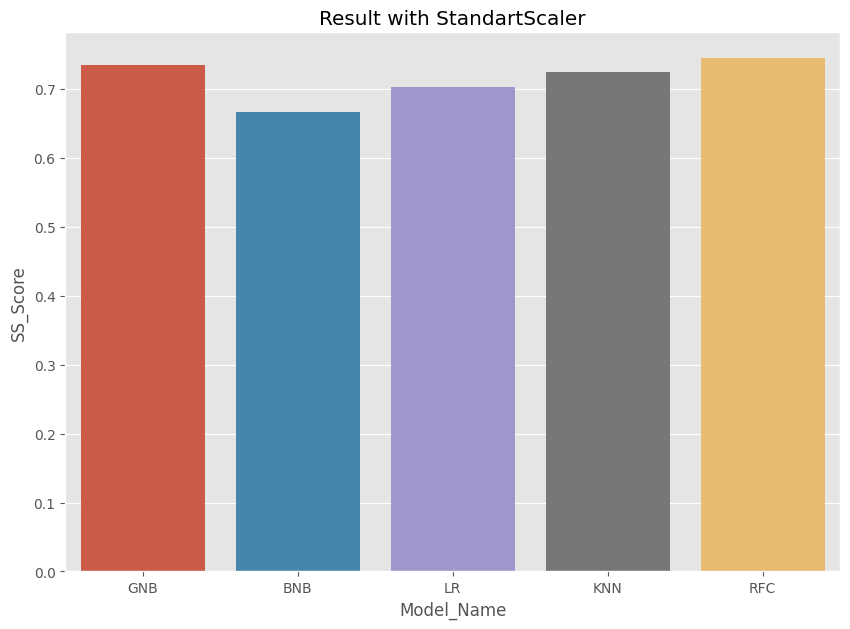

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x=ResoltML_Data["Model_Name"], y=ResoltML_Data["SS_Score"])
plt.xticks(rotation=0)
plt.xlabel("Model_Name")
plt.ylabel("SS_Score")
plt.title("Result with StandartScaler")